# Machine Learning Homework 5 - Final Project

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

## Data Loading

In [1]:
# Import Packages
import pandas as pd
import numpy as np

In [2]:
def data_load():
    # Loading Comma Seperated Data using read_table pandas function in 'census_train_data' and 'census_test_data' dataframe
    census_train_data= pd.read_csv('census_train.csv')
    census_test_data = pd.read_csv('census_test.csv', header=None)

    # Adding Headers to Data
    census_train_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin", "wages"]

    census_test_data.columns = ["idnum", "age", "workerclass", "interestincome", "traveltimetowork",\
                                 "vehicleoccupancy", "meansoftransport", "marital", "schoolenrollment",\
                                 "educationalattain", "sex", "workarrivaltime", "hoursworkperweek", "ancestry",\
                                 "degreefield", "industryworkedin"]

    # Add Wages column to test dataset for consistency
    census_test_data['wages'] = 0
    frames = [census_train_data, census_test_data]
    df = pd.concat(frames)
    df.shape
    return census_train_data, census_test_data, df

## Data Preprocessing

In [3]:
census_train_data, census_test_data, df = data_load()

# Check is any Null Values
df.isnull().values.any()

False

<div style="color:blue">
No Null values found. In this dataset, the symbol ? is used to indicate the value N/A (not applicable).
</div>

<div style="color:blue">
No Missing Values Found in:  
- idnum  
- age  
- interestincome  
- marital  
- sex  
- ancestry  
- wages  
<br/><br/>
<b>Age:</b>
<ul>
   <li>
       Found 22 people with age less than 16 and workerclass as "?" - Assign New Category (10): Age less than 16.</li>
   <li>
       Found 378 people who are currently non-worker - Assign New Category (11): People who never worked and not in labour force and last worked more than 5 years ago.
   </li>
</ul>
<br/>
<b>Travel time to work:</b>
<p>As the data say's, "?" are either not a worker or worker who worked at home. Therefore, they will never travel as they are working from home. Same applies to a worker who never worked.</p>
<br/>
<b>Vehicle Occupancy:</b>
<ul>
<li>People who are non-worker (Derived from workerclass) and using means of transport as (10 - Walk) or (11 - Work at home) are assumed never travelled - Assign New Category (0): Never travelled.</li>
<li>People using means of transport as (02 - Bus), (04 - Subway), and (05 - Railroad) are all public transport. Hence, we assigned them Category 10 - Carpool for 10 or more.</li>
<li>People using other means of transport and other missing values are assigned with New Category 11 - Other.</li>
</ul>
<br/>
<b>School Enrollment and Education Attain:</b>
<p>As the data say's, "?" are of age less than 3 years. In US, to enroll in school, the requirement is atleast 5 years. Hence, we assign a New Category here, 0 - No, less than 3 years.</p>
<br/>
<b>Work Arrival Time and Hours Per Week:</b>
<p>As the data depicts "?" as a non-worker. We assume that he/she will not travel to work and hence replace values with 0.</p>
<br/>
<b>Degree Field:</b>
<p>As the data depicts "?" as a degree less than bachelor's degree, we assign new category label 1000.</p>
<br/>
<b>Industry Worked In:</b>
<p>As the data depicts "?" a non-worker, we assign new category label 0100.</p>
<br/>
</div>

### Data Cleaning

In [4]:
# Preprocess data and feature creation
def pre_process_data(data):
    
    # Cleaning workerclass
    # age less than 16 
    data.loc[(data.age <= 16) & (data.workerclass =='?') , 'workerclass'] = '10'
    # people who never worked and not in labour force and last worked more than 5 years ago
    data.loc[(data.traveltimetowork =='?') & (data.vehicleoccupancy =='?') & \
             (data.meansoftransport =='?') & (data.workarrivaltime =='?') & \
             (data.hoursworkperweek =='?') & (data.industryworkedin =='?') & (data.workerclass =='?'), 'workerclass'] = '11' 
     
    # Cleaning traveltimetowork - Filling it with zero's (New Category) as worker who works from home will never travel, 
    # Same applies to a worker who never worked.
    data['traveltimetowork'] = data['traveltimetowork'].replace('?', 0)

    # Cleaning vehicleoccupancy
    # Category 0 - Never Travelled
    data.loc[(data.workerclass == '10') | (data.workerclass == '11') | (data.traveltimetowork == 0) \
             | (data.meansoftransport == '10') | (data.meansoftransport == '11'), 'vehicleoccupancy'] = '0'    
    # Category 10 - Carpool for 10 or more
    data.loc[(data.meansoftransport == '02') | (data.meansoftransport == '04')\
             | (data.meansoftransport == '05'), 'vehicleoccupancy'] = '10'
    # Cateogory 11 - Boat, Taxi, Cycle, Other and NAs
    data['vehicleoccupancy'] = data['vehicleoccupancy'].replace('?', '11')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['meansoftransport'] = data['meansoftransport'].replace('?', '0')

    # Cleaning schoolenrollment - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No, less than 3 years
    data['schoolenrollment'] = data['schoolenrollment'].replace('?', '0')

    # Cleaning educationalattain - Filling it with zero's (New Category) as the least age for enrollment is atleast 5 Years
    # 0 - No Education Attainment, less than 3 years
    data['educationalattain'] = data['educationalattain'].replace('?', '0')

    # Cleaning meansoftransport - Filling it with zero's (New Category) as non-worked is assumed that he/she will not travel to work
    data['workarrivaltime'] = data['workarrivaltime'].replace('?', '0')

    # Cleaning hoursworkperweek - Filling it with zero's (New Category) for non-worker
    data['hoursworkperweek'] = data['hoursworkperweek'].replace('?', 0)

    # Cleaning degreefield - Filling it with 1111 (New Category) for unknown degree
    # 1000, less than bachelor's degree (Related to educationattain)
    data['degreefield'] = data['degreefield'].replace('?', '1000')

    # Cleaning industryworkedin - Filling it with 1111 (New Category) for unknown degree
    # 100, less than 16 years old/not in labor force who last worked more than 5 years ago or never worked
    data['industryworkedin'] = data['industryworkedin'].replace('?', '0100')
        
    # Convert the categories feature to type 'category'
    data['workerclass'] = data['workerclass'].astype('category')
    data['vehicleoccupancy'] = data['vehicleoccupancy'].astype('category')
    data['meansoftransport'] = data['meansoftransport'].astype('category')
    data['marital'] = data['marital'].astype('category')
    data['schoolenrollment'] = data['schoolenrollment'].astype('category')
    data['educationalattain'] = data['schoolenrollment'].astype('category')
    data['sex'] = data['sex'].astype('category')
    data['workarrivaltime'] = data['workarrivaltime'].astype('category')
    data['ancestry'] = data['ancestry'].astype('category')
    data['degreefield'] = data['degreefield'].astype('category')
    data['industryworkedin'] = data['industryworkedin'].astype('category')
    
    # Convert numerical features to type 'int'
    data['idnum'] = data['idnum'].astype(int)
    data['age'] = data['age'].astype(int)
    data['interestincome'] = data['interestincome'].astype(int)
    data['traveltimetowork'] = data['traveltimetowork'].astype(int)
    data['hoursworkperweek'] = data['hoursworkperweek'].astype(int)
    data['wages'] = data['wages'].astype(int)
        
    return data

In [5]:
# Perform Data Cleaning
clean_data = pre_process_data(df)
df = clean_data
df.head(5)

,idnum,age,workerclass,interestincome,traveltimetowork,vehicleoccupancy,meansoftransport,marital,schoolenrollment,educationalattain,sex,workarrivaltime,hoursworkperweek,ancestry,degreefield,industryworkedin,wages
0,1,34,3,0,10,1,1,5,1,1,1,168,40,51,1000,7860,34500
1,2,57,2,0,15,8,1,5,1,1,1,100,30,51,1000,8390,4700
2,3,17,11,0,0,0,0,5,2,2,2,0,0,714,1000,0100,0
3,4,42,1,0,20,1,1,1,1,1,1,92,45,21,5001,6990,120000
4,5,18,11,0,0,0,0,5,2,2,2,0,0,999,1000,0100,0


## Feature Engineering  
<div style="color:blue">
<br/><br/>
<b>Mutual Information</b>
<p>Sci-kit learn’s mutual_info_regression() function was used to get the mutual information of each feature with the target variable.</p>
</div>

In [6]:
# Mutual Infogain plot
def plot_info(data, title):
    
    feature_name = data.keys()
    importance = data.values()
    
    # Plotting Feature_Names on X-Axis and Feature_importances on Y-Axis
    plt.figure(figsize=(12, 8))
    plt.bar(range(len(feature_name)), importance)
    plt.xticks(range(len(feature_name)), feature_name, rotation=40)
    plt.xlabel('Feature Name')
    plt.ylabel('Feature Importance')
    plt.title(title)
    plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


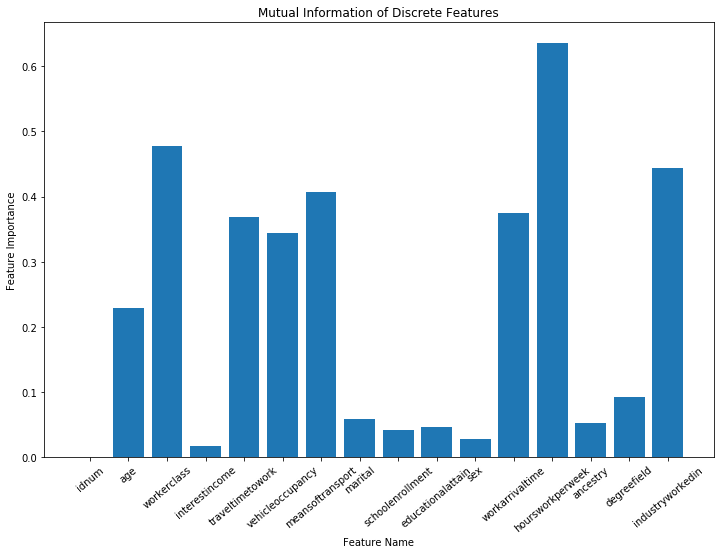

In [7]:
# Mutual Information Gain
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

mutual_df_train = df[:1183]
mutual_df_train_X = mutual_df_train.drop(['wages'], axis=1)
mutual_df_train_y = mutual_df_train['wages']
dis_mutual_info = mutual_info_regression(mutual_df_train_X, mutual_df_train_y, copy = True)
dis_res = dict(zip(df.columns.values, dis_mutual_info))
plot_info(dis_res, "Mutual Information of Discrete Features")

### Feature Drop

<div style="color:blue">
Based on Information Gain, we drop:  
- idnum (Dropped before Modeling)  
- interestincome  
- ancestry  
- schoolenrollment
</div>

In [8]:
# Drop given columns
def data_drop(data, columns):
    if columns is not None:
        data = data.drop(columns ,axis=1)
    return data

In [9]:
# Drop Columns
columns = ['interestincome','ancestry', 'schoolenrollment']
clean_data = data_drop(clean_data, columns)
df = clean_data
df.head(5)

,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages
0,1,34,3,10,1,1,5,1,1,168,40,1000,7860,34500
1,2,57,2,15,8,1,5,1,1,100,30,1000,8390,4700
2,3,17,11,0,0,0,5,2,2,0,0,1000,0100,0
3,4,42,1,20,1,1,1,1,1,92,45,5001,6990,120000
4,5,18,11,0,0,0,5,2,2,0,0,1000,0100,0


### Feature Extraction

<div style="color:blue">
<b>Productivity:</b>
<p>A new attribute ‘Productivity’ has been added to the dataset, it’s derived from the following attributes - age and education attained. A person’s income depends upon his capacity to work and how educated he is. The age of a person tells us about the capacity of that person and is inversely proportional to his productivity. Education attained is directly proportional to the productivity of a person and it increases with a person’s income. We take the class of the ‘educationalattain’ as the weight assigned to that education degree, so higher the class, higher is the weight of that degree. We can see what impact do age and education attained have on a person’s income below:
</p>
![title](Visualizations/Age-Education-Wage.png)
<br/>
<b>Wage Class:</b>
<p>A binary classifier is used to classify if a person earns or not, ‘0’ for a person who does not earn and ‘1’ otherwise. If a person is classified to be earning, then we use regression to predict his income else we mark his income as zero.
<br/><br/>
These two attributes ‘Productivity’ and ‘wageclass’ are added as numerical attributes to the feature set and used further to develop the model.
</p>
</div>

In [10]:
def feature_creation(data):
    # Productivity
    data['productivity'] = data['educationalattain'].astype(int)-data['age'].astype(int)
    
    # Wage Class - For Binary Classifier
    data['wageclass'] = np.where(data['wages'] == 0, 0, 1)
    
    # Convert numerical features to type 'int'
    data['wageclass'] = data['wageclass'].astype(int)
    data['productivity']  = data['productivity'].astype(int)
    
    return df

In [11]:
# Add Derived Features
df = feature_creation(df)
df.head(5)

,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,1,34,3,10,1,1,5,1,1,168,40,1000,7860,34500,-33,1
1,2,57,2,15,8,1,5,1,1,100,30,1000,8390,4700,-56,1
2,3,17,11,0,0,0,5,2,2,0,0,1000,0100,0,-15,0
3,4,42,1,20,1,1,1,1,1,92,45,5001,6990,120000,-41,1
4,5,18,11,0,0,0,5,2,2,0,0,1000,0100,0,-16,0


In [12]:
# From our combined we get back our train & test datasets
train = df[:1183]
test = df[1183:]

print(train.shape)
print(test.shape)

# Combine train and test so we can continue performing other operations on the whole dataset
frames = [train, test]
df = pd.concat(frames)
print(df.shape)

# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(1183, 16)
(500, 16)
(1683, 16)


(array([], dtype=int64),)

## Data Transformation - Scaling and One-Hot Encoding

## Scaling  
<br/>
<div style="color:blue">
<p>We standardize the range of numerical features of data by scaling. Smaller weights are considered more regular or less specialized and as such, we refer to this penalty as weight regularization. Feature standardization makes the values of each feature in the data we have zero-mean (when subtracting the mean in the numerator) and unit-variance. In scaling, we have used standard scalar from ski-kit learn to scale numerical features except for idnum, wages and wageclass.</p>
</div>

In [13]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    # Get all numeric features
    numerical_features = []
    for feature in df.dtypes.index:
        # Exclude the target variable 'wages' and 'idnum' column    
        if (df[feature].dtype != np.object) and (str(df[feature].dtype) != 'category') \
                and (feature != 'wages') and (feature != 'wageclass') and (feature != 'idnum'):
            numerical_features.append(feature)

    print(numerical_features)
    
    # Perform Standard Scaling for numerical features only
    scaler = StandardScaler()

    # Again, from our combined df we get back our train & test datasets
    train = df[:1183]
    test = df[1183:]

    train.loc[:,numerical_features] = scaler.fit_transform(train[numerical_features])
    test.loc[:,numerical_features] = scaler.transform(test[numerical_features])

    # Combine train and test so we can continue performing other operations on the whole dataset
    frames = [train, test]
    df = pd.concat(frames)

    return df

In [14]:
df = perform_scaling(df)
df.head(5)

['age', 'traveltimetowork', 'hoursworkperweek', 'productivity']


/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,idnum,age,workerclass,traveltimetowork,vehicleoccupancy,meansoftransport,marital,educationalattain,sex,workarrivaltime,hoursworkperweek,degreefield,industryworkedin,wages,productivity,wageclass
0,1,-0.701676,3,-0.275096,1,1,5,1,1,168,0.795301,1000,7860,34500,0.684744,1
1,2,0.444641,2,-0.072684,8,1,5,1,1,100,0.321874,1000,8390,4700,-0.448610,1
2,3,-1.548954,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.571717,0
3,4,-0.302957,1,0.129729,1,1,1,1,1,92,1.032014,5001,6990,120000,0.290534,1
4,5,-1.499114,11,-0.679921,0,0,5,2,2,0,-1.098406,1000,0100,0,1.522441,0


In [15]:
# Make sure there is no null value in the target feature
np.where(np.isnan(df['wages']))

(array([], dtype=int64),)

## Correlation Matrix

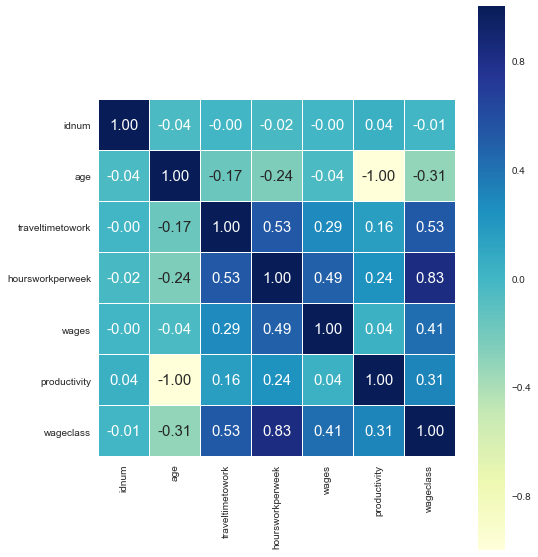

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df_train = df[:1183]

# check for any correlations between variables
corr = corr_df_train.corr()
sns.set(rc={'figure.figsize':(8,10)})
sns.heatmap(corr, cmap='YlGnBu', cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, linewidths=0.5)
plt.show()

## One-Hot Encoding

<div style="color:blue">
<p>Perform One Hot Encoding to convert categorical features into a form that could be provided to ML algorithms to do a better job in prediction.</p>
</div>

In [17]:
def perform_one_hot_encoding(df):
    # Get all categorical features
    categorical_features = []
    for feature in df.dtypes.index:
        if (str(df[feature].dtype) == 'category'):
            categorical_features.append(feature)

    print(categorical_features)
    
    # Perform One-Hot Encoding
    df_dummies = pd.get_dummies(df[categorical_features])
    df = df.drop(df[categorical_features],axis=1)
    df = pd.concat([df, df_dummies],axis=1)
    return df

In [18]:
df = perform_one_hot_encoding(df)
df.head(5)

['workerclass', 'vehicleoccupancy', 'meansoftransport', 'marital', 'educationalattain', 'sex', 'workarrivaltime', 'degreefield', 'industryworkedin']


,idnum,age,traveltimetowork,hoursworkperweek,wages,productivity,wageclass,workerclass_1,workerclass_10,workerclass_11,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,1,-0.701676,-0.275096,0.795301,34500,0.684744,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.444641,-0.072684,0.321874,4700,-0.448610,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,-1.548954,-0.679921,-1.098406,0,1.571717,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,-0.302957,0.129729,1.032014,120000,0.290534,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,-1.499114,-0.679921,-1.098406,0,1.522441,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# For the last time, from our combined df we get back our train & test datasets.
train = df[:1183]#1183
test = df[1183:]

test = test.drop(['wages','wageclass'],axis=1)

print(train.shape)
print(test.shape)

(1183, 493)
(500, 491)


## Model Selection using Cross-Validation and Parameter Tuning 
<br/>
<div style="color:blue">
<p>Initially, we do predictions on whether a person is earning or not. As it is a classification problem, we will be using different classifiers for this case and choose the best one. Classification predictions will be better as compared to regression predictions as regression problems have real value while classification has binary value. We will take only predictions for a person classified as not earning in final predictions and predictions for the person who earns will be done using regressor. We also improved the classifiers and regressors using hyperparameter tuning with 5-fold Cross Validation. We did 5 fold cross validation, as we have 1184 rows in the dataset, so we thought k = 5 will be an optimal value for it.
<br/><br/>
For binary classification, we used Random Forest Classifier and Decision tree Classifier and calculated the accuracy using Hyperparameter Tuning. Decision trees and Random Forest implicitly perform variable screening or feature selection. Therefore, we thought it is good for classification and chose this for binary predictions.</p>
</div>

### Evaluation Metric - Root Mean Squared Error

In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(actual, predictions):
    predictions = np.round(predictions/100)*100
    mse = mean_squared_error(actual, predictions)
    return sqrt(mse)

### Train-Test Split

In [21]:
# Seperating features and labels
X = train.drop(['idnum', 'wages', 'wageclass'],axis=1)
y = train[['wages', 'wageclass']]
X.head(5)

,age,traveltimetowork,hoursworkperweek,productivity,workerclass_1,workerclass_10,workerclass_11,workerclass_2,workerclass_3,workerclass_4,...,industryworkedin_9470,industryworkedin_9480,industryworkedin_9490,industryworkedin_9570,industryworkedin_9590,industryworkedin_9670,industryworkedin_9680,industryworkedin_9770,industryworkedin_9870,industryworkedin_9920
0,-0.701676,-0.275096,0.795301,0.684744,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.444641,-0.072684,0.321874,-0.448610,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.548954,-0.679921,-1.098406,1.571717,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.302957,0.129729,1.032014,0.290534,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.499114,-0.679921,-1.098406,1.522441,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y.head(5)

,wages,wageclass
0,34500,1
1,4700,1
2,0,0
3,120000,1
4,0,0


In [23]:
from sklearn.model_selection import train_test_split

# Train-Test Split
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(828, 490)
(828, 2)
(355, 490)
(355, 2)


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Classifier Hyperparameter Tuning

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### Random Forest Classifier

In [25]:
# Parameter Tuning - Classifiers
# Random Forest
from sklearn.model_selection import RandomizedSearchCV

def random_forest_classifier_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestClassifier()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    rf_random.fit(x_train, y_train['wageclass'])
    return rf_random.best_params_

In [26]:
rf_random_best_params = random_forest_classifier_tuning()
rf_random_best_params

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[C

[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.8s


[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False, total=   1.8s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=60, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=100, bootstrap=False, total=   2.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=600,

[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   4.1s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.8s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False, total=   1.9s
[CV] n_estimators=800, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=False, total=   3.9s
[CV] n_estimators=80

[CV] n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   4.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   4.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1800, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=False, total=   4.9s
[CV] n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=1600, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=70, bootstrap=False, total=   4.3s
[CV] n_estimator

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   2.3s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=40, bootstrap=False, total=   4.1s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=100, bootstrap=False 
[CV]  n_estimators=10

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.3min


[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.2s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   4.4s
[CV] n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=False, total=   2.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=False 
[CV]  n_estimators=800

[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.5s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   2.6s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800,

[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=False, total=   0.6s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True, total=   3.3s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=1000

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   7.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=50, bootstrap=False, total=   7.3s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.4s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=50, bootstrap=False, total=   2.3s
[CV] n_estim

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.5s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=80, bootstrap=True, total=   4.2s
[CV] n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.5s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=100, bootstrap=True, total=   3.8s
[CV] n_estimators=1400, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=80, bootstrap=True 
[CV]  n_estimators=14

[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.4s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.3s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.4s
[CV] n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=1600, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   5.1s
[CV] n_e

[CV]  n_estimators=1400, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=80, bootstrap=False, total=   4.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.2min


[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.7s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.5s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=20, bootstrap=False, total=   2.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True, total=   4.8s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=60, bootstrap=True 
[CV]  n_estimators=1800, min

[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True, total=   6.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, bootstrap=True, total=   2.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_sampl

[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.3s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=False, total=   2.2s
[CV] n_estimators=400,

[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.0s
[CV] n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=800, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.0s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, bootstrap=False, total=   4.9s
[CV] n_estimators=600, min_sampl

[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   5.8s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=20, bootstrap=True, total=   5.9s
[CV] n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=40, bootstrap=True, total=   6.1s
[CV]  n_estimators=200

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.1min finished


{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1400}

### Decision Tree Classifier

In [27]:
# Decision Tree - Parameter Tuning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def decision_tree_classifier_tuning():
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_features = [1,2,3,4,5,6,7,8,9,10]
    min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
    min_samples_split = [2,3,4,5,6,7,8,9,10]
    criterion = ["gini", "entropy"]
    random_grid = {"max_depth": max_depth,
                  "max_features": max_features,
                  "min_samples_leaf": min_samples_leaf,
                  "min_samples_split":min_samples_split,
                  "criterion": criterion}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeClassifier()
    # Random search of parameters, using 5 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = RandomizedSearchCV(estimator = decision_tree, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    #dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    dt_random.fit(x_train, y_train['wageclass'])
    return dt_random.best_params_

In [28]:
dt_random_best_params = decision_tree_classifier_tuning()
dt_random_best_params

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy 
[CV] min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy 
[CV] min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy 
[CV] min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy, total=   0.0s
[CV]  min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=6, max_features=6, max_depth=70, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=6, max_features=10, max_depth=10, criterion=gini 
[CV]  min_samples_split=2, min_samples_

[CV]  min_samples_split=7, min_samples_leaf=3, max_features=1, max_depth=60, criterion=entropy, total=   0.0s
[CV]  min_samples_split=9, min_samples_leaf=2, max_features=10, max_depth=50, criterion=gini, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_features=1, max_depth=60, criterion=entropy 
[CV] min_samples_split=7, min_samples_leaf=3, max_features=7, max_depth=20, criterion=entropy 
[CV] min_samples_split=5, min_samples_leaf=1, max_features=9, max_depth=70, criterion=entropy 
[CV] min_samples_split=9, min_samples_leaf=2, max_features=10, max_depth=50, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=3, max_features=1, max_depth=60, criterion=entropy, total=   0.0s
[CV]  min_samples_split=7, min_samples_leaf=3, max_features=7, max_depth=20, criterion=entropy, total=   0.0s
[CV]  min_samples_split=5, min_samples_leaf=1, max_features=9, max_depth=70, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=3, max_features=1, max_depth=60

[CV] min_samples_split=7, min_samples_leaf=7, max_features=10, max_depth=110, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=8, max_features=9, max_depth=20, criterion=gini, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=8, max_features=9, max_depth=20, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=7, max_features=10, max_depth=110, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=7, max_features=10, max_depth=110, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=8, max_features=9, max_depth=20, criterion=gini, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=6, max_features=9, max_depth=10, criterion=gini 
[CV]  min_samples_split=10, min_samples_leaf=8, max_features=5, max_depth=100, criterion=entropy, total=   0.1s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=5, max_depth=100, criterion=entropy 
[CV]  min_samples_split=7, min_samples_leaf=7, max_features=10, max_depth=110, criterio

[CV] min_samples_split=2, min_samples_leaf=2, max_features=3, max_depth=10, criterion=gini 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=3, max_depth=10, criterion=gini, total=   0.0s
[CV] min_samples_split=9, min_samples_leaf=1, max_features=5, max_depth=20, criterion=gini 
[CV] min_samples_split=3, min_samples_leaf=6, max_features=10, max_depth=40, criterion=gini 
[CV] min_samples_split=2, min_samples_leaf=2, max_features=3, max_depth=10, criterion=gini 
[CV]  min_samples_split=8, min_samples_leaf=1, max_features=2, max_depth=80, criterion=gini, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=1, max_features=2, max_depth=80, criterion=gini 
[CV]  min_samples_split=2, min_samples_leaf=2, max_features=3, max_depth=10, criterion=gini, total=   0.0s
[CV]  min_samples_split=9, min_samples_leaf=1, max_features=5, max_depth=20, criterion=gini, total=   0.0s
[CV]  min_samples_split=8, min_samples_leaf=1, max_features=2, max_depth=80, criterion=gini, total=   0.0s
[CV]

[CV]  min_samples_split=4, min_samples_leaf=3, max_features=4, max_depth=50, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=3, max_features=9, max_depth=100, criterion=gini 
[CV] min_samples_split=2, min_samples_leaf=7, max_features=7, max_depth=20, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=7, max_features=8, max_depth=100, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=2, max_features=2, max_depth=30, criterion=gini 
[CV] min_samples_split=9, min_samples_leaf=3, max_features=8, max_depth=10, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=3, max_features=9, max_depth=100, criterion=gini, total=   0.0s
[CV]  min_samples_split=2, min_samples_leaf=7, max_features=7, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=3, max_features=9, max_depth=100, criterion=gini 
[CV] min_samples_split=2, min_samples_leaf=7, max_features=7, max_depth=20, criterion=entropy 
[CV

[CV] min_samples_split=2, min_samples_leaf=5, max_features=2, max_depth=100, criterion=gini 
[CV] min_samples_split=3, min_samples_leaf=5, max_features=6, max_depth=70, criterion=entropy 
[CV] min_samples_split=2, min_samples_leaf=8, max_features=4, max_depth=100, criterion=gini 
[CV]  min_samples_split=3, min_samples_leaf=5, max_features=6, max_depth=70, criterion=entropy, total=   0.0s
[CV]  min_samples_split=2, min_samples_leaf=8, max_features=4, max_depth=100, criterion=gini, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=5, max_features=6, max_depth=70, criterion=entropy 
[CV]  min_samples_split=2, min_samples_leaf=5, max_features=2, max_depth=100, criterion=gini, total=   0.0s
[CV] min_samples_split=2, min_samples_leaf=8, max_features=4, max_depth=10, criterion=entropy 
[CV] min_samples_split=2, min_samples_leaf=5, max_features=2, max_depth=100, criterion=gini 
[CV]  min_samples_split=3, min_samples_leaf=5, max_features=6, max_depth=70, criterion=entropy, total=   0.0s


[CV] min_samples_split=7, min_samples_leaf=7, max_features=1, max_depth=90, criterion=entropy 
[CV] min_samples_split=4, min_samples_leaf=1, max_features=6, max_depth=40, criterion=gini 
[CV]  min_samples_split=2, min_samples_leaf=5, max_features=3, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_features=10, max_depth=30, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=7, max_features=1, max_depth=90, criterion=entropy, total=   0.0s
[CV]  min_samples_split=4, min_samples_leaf=1, max_features=6, max_depth=40, criterion=gini, total=   0.0s
[CV]  min_samples_split=4, min_samples_leaf=1, max_features=10, max_depth=30, criterion=gini, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_features=6, max_depth=40, criterion=gini 
[CV] min_samples_split=4, min_samples_leaf=1, max_features=10, max_depth=30, criterion=gini 
[CV] min_samples_split=4, min_samples_leaf=7, max_features=6, max_depth=30, criterion=entropy 
[CV] 

[CV]  min_samples_split=7, min_samples_leaf=1, max_features=4, max_depth=70, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=2, max_depth=10, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=1, max_features=1, max_depth=20, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=1, max_features=1, max_depth=20, criterion=entropy 
[CV] min_samples_split=7, min_samples_leaf=2, max_features=9, max_depth=20, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=8, max_features=2, max_depth=10, criterion=gini, total=   0.0s
[CV]  min_samples_split=5, min_samples_leaf=4, max_features=5, max_depth=40, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=8, max_features=2, max_depth=10, criterion=gini 
[CV] min_samples_split=5, min_samples_leaf=4, max_features=5, max_depth=40, criterion=entropy 
[CV]  min_samples_split=7, min_samples_leaf=1, max_features=1, max_depth=20, criterion=entropy

[CV]  min_samples_split=8, min_samples_leaf=8, max_features=9, max_depth=90, criterion=gini, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=3, max_features=2, max_depth=20, criterion=gini 
[CV] min_samples_split=7, min_samples_leaf=1, max_features=4, max_depth=70, criterion=gini 
[CV] min_samples_split=8, min_samples_leaf=8, max_features=9, max_depth=90, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=1, max_features=4, max_depth=70, criterion=gini, total=   0.0s
[CV]  min_samples_split=10, min_samples_leaf=3, max_features=2, max_depth=20, criterion=gini, total=   0.0s
[CV]  min_samples_split=8, min_samples_leaf=8, max_features=9, max_depth=90, criterion=gini, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=1, max_features=2, max_depth=20, criterion=gini 
[CV] min_samples_split=7, min_samples_leaf=1, max_features=4, max_depth=70, criterion=gini 
[CV] min_samples_split=8, min_samples_leaf=8, max_features=9, max_depth=90, criterion=gini 
[CV] min_samples_s

[CV] min_samples_split=10, min_samples_leaf=1, max_features=1, max_depth=90, criterion=gini 
[CV] min_samples_split=5, min_samples_leaf=6, max_features=9, max_depth=30, criterion=gini 
[CV]  min_samples_split=2, min_samples_leaf=9, max_features=2, max_depth=90, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=8, max_features=3, max_depth=80, criterion=entropy 
[CV] min_samples_split=9, min_samples_leaf=10, max_features=3, max_depth=110, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=8, max_features=3, max_depth=80, criterion=entropy, total=   0.0s
[CV]  min_samples_split=10, min_samples_leaf=1, max_features=1, max_depth=90, criterion=gini, total=   0.0s
[CV]  min_samples_split=9, min_samples_leaf=10, max_features=3, max_depth=110, criterion=gini, total=   0.0s
[CV] min_samples_split=9, min_samples_leaf=10, max_features=3, max_depth=110, criterion=gini 
[CV] min_samples_split=10, min_samples_leaf=1, max_features=1, max_depth=90, criterion=gini 
[C

[CV]  min_samples_split=9, min_samples_leaf=2, max_features=1, max_depth=80, criterion=entropy, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=10, max_features=10, max_depth=30, criterion=gini 
[CV] min_samples_split=7, min_samples_leaf=10, max_features=9, max_depth=90, criterion=gini 
[CV]  min_samples_split=7, min_samples_leaf=4, max_features=2, max_depth=70, criterion=entropy, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=4, max_features=2, max_depth=70, criterion=entropy 
[CV]  min_samples_split=6, min_samples_leaf=4, max_features=1, max_depth=80, criterion=gini, total=   0.0s
[CV]  min_samples_split=7, min_samples_leaf=10, max_features=9, max_depth=90, criterion=gini, total=   0.0s
[CV] min_samples_split=7, min_samples_leaf=10, max_features=9, max_depth=90, criterion=gini 
[CV]  min_samples_split=6, min_samples_leaf=10, max_features=10, max_depth=30, criterion=gini, total=   0.0s
[CV]  min_samples_split=7, min_samples_leaf=4, max_features=2, max_depth=70, crit

[CV] min_samples_split=8, min_samples_leaf=5, max_features=6, max_depth=70, criterion=gini 
[CV] min_samples_split=3, min_samples_leaf=7, max_features=10, max_depth=60, criterion=entropy 
[CV]  min_samples_split=3, min_samples_leaf=8, max_features=9, max_depth=70, criterion=gini, total=   0.0s
[CV] min_samples_split=3, min_samples_leaf=8, max_features=9, max_depth=70, criterion=gini 
[CV]  min_samples_split=4, min_samples_leaf=5, max_features=9, max_depth=60, criterion=gini, total=   0.0s
[CV]  min_samples_split=8, min_samples_leaf=5, max_features=6, max_depth=70, criterion=gini, total=   0.0s
[CV]  min_samples_split=3, min_samples_leaf=7, max_features=10, max_depth=60, criterion=entropy, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=5, max_features=9, max_depth=60, criterion=gini 
[CV] min_samples_split=8, min_samples_leaf=5, max_features=6, max_depth=70, criterion=gini 
[CV]  min_samples_split=3, min_samples_leaf=8, max_features=9, max_depth=70, criterion=gini, total=   0.

[Parallel(n_jobs=-1)]: Done 362 tasks      | elapsed:    2.2s


[CV] min_samples_split=3, min_samples_leaf=8, max_features=9, max_depth=70, criterion=gini 
[CV]  min_samples_split=4, min_samples_leaf=5, max_features=9, max_depth=60, criterion=gini, total=   0.0s
[CV] min_samples_split=6, min_samples_leaf=9, max_features=5, max_depth=80, criterion=gini 
[CV]  min_samples_split=3, min_samples_leaf=8, max_features=9, max_depth=70, criterion=gini, total=   0.0s
[CV]  min_samples_split=6, min_samples_leaf=9, max_features=5, max_depth=80, criterion=gini, total=   0.0s
[CV] min_samples_split=9, min_samples_leaf=5, max_features=7, max_depth=110, criterion=entropy 
[CV] min_samples_split=6, min_samples_leaf=9, max_features=5, max_depth=80, criterion=gini 
[CV]  min_samples_split=8, min_samples_leaf=5, max_features=6, max_depth=70, criterion=gini, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_features=6, max_depth=70, criterion=gini 
[CV]  min_samples_split=9, min_samples_leaf=5, max_features=7, max_depth=110, criterion=entropy, total=   0.

[CV] min_samples_split=4, min_samples_leaf=6, max_features=2, max_depth=30, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=6, max_features=2, max_depth=30, criterion=entropy, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=6, max_features=2, max_depth=30, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=6, max_features=2, max_depth=30, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=50, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=50, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=50, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=50, criterion=entropy, total=   0.0s
[CV] min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=50, criterion=entropy 
[CV]  min_samples_split=10, min_samples_leaf=10, max_features=6, max_depth=

[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished


{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [25]:
# Classification Predictions using 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

Name=[]
Accuracy=[]

# Defining Models with Default Parameters
decision_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 70, max_features = 7, \
                                       min_samples_leaf = 1, min_samples_split = 10)
random_forest = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Running Models with Default Parameters and Cross-Validation
for model, label in zip([decision_tree, random_forest], \
                        ['Decision Tree', 'Random Forest']):
    # Evaluate Model Score by performing 5-fold Cross-Validation
    scores = cross_val_score(model, x_train, y_train['wageclass'], cv=5, scoring='accuracy')
    # Consider Mean of Model Scores
    Accuracy.append(scores.mean())
    Name.append(model.__class__.__name__)
    print("Accuracy: %f of model %s" % (scores.mean(),label))

Accuracy: 0.927688 of model Decision Tree
Accuracy: 0.971055 of model Random Forest


<div style="color:blue">
After tuning, Random Forest Classifier gives a good classification accuracy and hence, we will use for our final binary predictions.
</div>

## Model Selection - Classifier (Random Forest)

In [26]:
# Classification Model
random_forest_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Fit the model
random_forest_classifier.fit(x_train, y_train['wageclass'])

# Predictions
classifier_predictions = random_forest_classifier.predict(x_test)

## Regressor Hyperparameter Tuning  
<br/>
<div style="color:blue">
The data given to us is non linearly separable data, and we don’t have a certain way or equation to express the relationship between dependent and independent variables, so we decided to use Decision Tree regressor as it also allows us to do feature selection or variable screening, and it is not sensitive to outliers, Random forest regressor as it’s simple and fast and Support Vector Regressor with linear kernel because it provides flexibility in terms of distribution and avoids overfitting by allowing us to control cost parameters for penalizing the regression.
</div>

In [27]:
# Import Model Libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, make_scorer

### Random Forest Regressor

In [43]:
from sklearn.model_selection import RandomizedSearchCV
def rf_tuning():
    # Number of trees in random forest
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']
    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]
    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]
    # Method of selecting samples for training each tree
    bootstrap = [True, False]
    # Create the random grid
    random_grid = {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    random_forest = RandomForestRegressor()
    # Random search of parameters, using 5 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    rf_random.fit(x_train, y_train['wages'])
    return rf_random.best_params_

In [44]:
rf_best_params = rf_tuning()

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=50, bootstrap=True, total=   0.6s
[CV] n_estimators=600, min_samples_split=10

[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   39.7s finished


In [45]:
rf_best_params

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 1400}

### Decision Tree Regressor

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

def decision_tree_tuning():
    random_grid = {"criterion": ["mse"],
                  "min_samples_split": [10, 20, 40],
                  "max_depth": [2, 6, 8],
                  "min_samples_leaf": [20, 40, 100],
                  "max_leaf_nodes": [5, 20, 100],
                  }

    
    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    decision_tree = DecisionTreeRegressor()

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    dt_random = GridSearchCV(estimator = decision_tree, param_grid = random_grid, cv = 5, verbose=2, n_jobs = -1)
    # Fit the random search model
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    dt_random.fit(x_train, y_train['wages'])
    return dt_random.best_params_

In [50]:
dt_best_params = decision_tree_tuning()

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=20 


[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=2

[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=20, mi

[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV] criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=2, max_leaf_nodes=100, mi

[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=40 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=100, min_samples_spl

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.4s


[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=20, min_samples_leaf=40, min_samples

[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=6, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=6, max_leaf_nodes=100, min_samp

[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=20, min_samples_split=10,

[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=20, min_samples_split=20 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=40, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=40, min_samples_

[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=20, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=20, min_samples_split=10 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samp

[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=20, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=10 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40, total=   0.0s
[CV] criterion=mse, max_depth=8, max_leaf_nodes=100, min_samples_leaf=100, min_samples_split=40 
[CV]  criterion=mse, max_depth=8, max_leaf_nodes=100

[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    3.3s finished


In [51]:
dt_best_params

{'criterion': 'mse',
 'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 10}

### Support Vector Regressor

In [52]:
def svc_param_selection():
    hyperparams = { 
       "kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
       "gamma" : [1e-1, 1e-2, 1e-3, 1e-4],
       "C" : [1, 10, 100, 1000]}
    SVM = SVR()
    grid_search = GridSearchCV(estimator=SVM, param_grid=hyperparams, cv=5)
    x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=85))
    grid_search.fit(x_train, y_train['wages'])
    grid_search.best_params_
    return grid_search.best_params_

In [53]:
svr_best_params = svc_param_selection()

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [54]:
svr_best_params

{'C': 1000, 'gamma': 0.1, 'kernel': 'linear'}

In [28]:
# Import Model Libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, make_scorer

# Using Hyperparameters
# Initialize different regression algorithms
x_train, x_test, y_train, y_test = np.array(train_test_split(X, y, train_size = 0.7, random_state=29))

decision_tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 2, max_leaf_nodes = 20,\
                                         min_samples_leaf = 20, min_samples_split = 10)
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
SVM = SVR(C=1000, gamma = 0.1, kernel = 'linear')

models = [decision_tree, random_forest, SVM]
model_name = ['decision_tree','random_forest', 'SVR']
scorer = make_scorer(r2_score)
result = {}

for name, model in enumerate(models):
    # Fit the Model
    model.fit(x_train, y_train['wages'])

    # Get the Scores
    train_score = model.score(x_train, y_train['wages'])
    cv_score = cross_val_score(model, x_train, y_train['wages'],cv=5, scoring = scorer)
    preds = model.predict(x_test)
    rmse_score = rmse(y_test['wages'], preds)

    # Add Results
    name = model_name[name]
    result[name] = [train_score, cv_score.mean(), rmse_score]

for model_scores in result:
    print(model_scores, result[model_scores])

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


decision_tree [0.45131171860968206, 0.38149518889862943, 46630.81115543761]
random_forest [0.8072526446361293, 0.41508653946354634, 33272.771378580226]
SVR [0.21920380389110186, 0.2594037697570884, 36477.79671580284]


<div style="color:blue" align="center">
<b>Model Performance</b>
<table>
  <tr>
    <th>Model</th>
    <th>Train Score</th>
    <th>CV Score</th>
    <th>RMSE</th>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.4513</td>
    <td>0.3814</td>
    <td>46630.8111</td>
  </tr>
  <tr>
    <td>Random Forest</td>
    <td>0.8042</td>
    <td>0.4146</td>
    <td>33166.6664</td>
  </tr>
  <tr>
    <td>SVR</td>
    <td>0.2192</td>
    <td>0.2594</td>
    <td>36477.7967</td>
  </tr>
</table>
</div>

<div style="color:blue">
Based on 5-fold Cross Validation, we can see that Random Forest Regressor is better at predicting. It also has low RMSE. Hence, we choose Ramdom Forest Regressor for our final predictions.
</div>

In [29]:
random_forest = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                    min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
# Fit the Model
random_forest.fit(x_train, y_train['wages'])

# Get the Scores
reg_predictions = random_forest.predict(x_test)

compare_df = pd.DataFrame()
compare_df['actuals'] = y_test['wages']
compare_df['final_predictions'] = np.round(reg_predictions/100)*100
compare_df['final_predictions'] = compare_df['final_predictions'].astype(int)
compare_df['classifier_predictions'] = classifier_predictions
compare_df['classifier_predictions'] = compare_df['classifier_predictions'].astype(int)
compare_df.loc[(compare_df.classifier_predictions == 0), 'final_predictions'] = 0

print("Random Forest Regressor RMSE = "+str(rmse(compare_df['actuals'], compare_df['final_predictions'])))

Random Forest Regressor RMSE = 32923.58651505155


In [30]:
# Total Correct Predictions of person not earning
print("Total Correct Predictions of person not earning = "+str(len(compare_df[compare_df['final_predictions']==0])) \
     +" out of "+str(len(compare_df[compare_df['actuals']==0])))

Total Correct Predictions of person not earning = 140 out of 155


## Submission

In [31]:
# Classification Model for getting predictions for person who are not earning.
random_forest_classifier = RandomForestClassifier(n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2, \
                                       max_features = 'sqrt', max_depth = 50, bootstrap = True)

# Fit the model
random_forest_classifier.fit(x_train, y_train['wageclass'])

# Predictions
classifier_predictions = random_forest_classifier.predict(test.drop(['idnum'], axis=1))

# Regression Model for getting predictions for person who are earning.
random_forest_regressor = RandomForestRegressor(bootstrap = False, max_depth = 20, max_features = 'sqrt', \
                            min_samples_leaf = 1, min_samples_split = 10, n_estimators = 600)
# Fit the Model
random_forest_regressor.fit(x_train, y_train['wages'])

# Get the Scores
reg_predictions = random_forest.predict(test.drop(['idnum'], axis=1))

In [32]:
submission_df= pd.DataFrame()
submission_df['Id'] = test['idnum']
submission_df['Wages'] = np.round(reg_predictions/100)*100
submission_df['Wages'] = submission_df['Wages'].astype(int)

submission_df['classifier_predictions'] = classifier_predictions
submission_df['classifier_predictions'] = submission_df['classifier_predictions'].astype(int)
submission_df.loc[(submission_df.classifier_predictions == 0), 'Wages'] = 0

In [33]:
del submission_df['classifier_predictions']

In [34]:
submission_df.head(5)

,Id,Wages
0,1405,0
1,1406,46100
2,1407,103300
3,1408,0
4,1410,121000


In [35]:
submission_df.to_csv("test_outputs.csv", index=False)